# <center> Matthew Kearney - CS 559 Homework 4 - Logistic Regression <center>

### sklearn.linear_model.LogisticRegression : ** 
 ** Note that regularization is applied by default. It can handle both dense and sparse input. **
 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [17]:
from sklearn import datasets
import pandas as pd
import numpy as np

X, y, centers = datasets.make_blobs(n_samples = 400, n_features = 5, 
            centers=4, cluster_std = 2, random_state=100, return_centers=True)

DF_y= pd.DataFrame(X)
DF_y['y']= y
DF_y.describe()

,0,1,2,3,4,y
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,2.501801,-0.171144,-1.924378,-0.305263,-4.699703,1.500000
std,7.106310,5.386289,5.738445,7.386226,4.542171,1.119434
min,-13.988528,-11.453264,-11.237727,-12.443107,-14.516139,0.000000
25%,-3.125374,-5.041711,-6.608316,-7.471891,-7.720204,0.750000
50%,4.334354,-0.794481,-3.676851,-0.609203,-4.983614,1.500000
75%,8.195862,4.551928,3.194268,6.915890,-2.018655,2.250000
max,14.721231,12.628629,12.288559,13.242304,7.269805,3.000000


In [18]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_s = scaler.fit_transform(X)
## y is a discrete target, so we don't want to touch this

DF = pd.DataFrame(X_s)
DF.describe() ## means are very close to zero.

,0,1,2,3,4
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,5.995204e-17,-2.220446e-18,-2.708944e-16,-3.330669e-17,-4.196643e-16
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-2.323425e+00,-2.097223e+00,-1.625007e+00,-1.645366e+00,-2.163883e+00
25%,-7.928478e-01,-9.053853e-01,-8.172602e-01,-9.714844e-01,-6.658233e-01
50%,2.581997e-01,-1.158716e-01,-3.057740e-01,-4.120108e-02,-6.258379e-02
75%,8.022716e-01,8.779675e-01,8.931089e-01,9.788756e-01,5.909960e-01
max,1.721672e+00,2.379338e+00,2.479894e+00,1.836463e+00,2.638495e+00


### Preprocessing, EDA Visualization

Linearity assumption

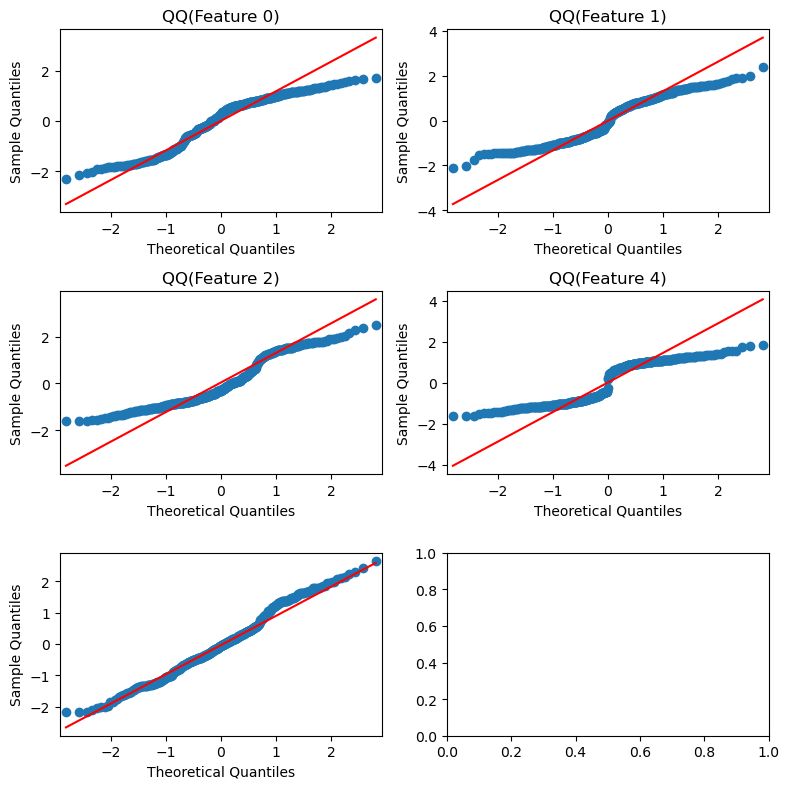

In [19]:
import statsmodels.api as sm
fig, ((ax1,ax2),(ax3,ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(8,8))
fig = sm.qqplot(DF[0], line='q', ax=ax1)
ax1.set_title('QQ(Feature 0)')
fig = sm.qqplot(DF[1], line='q',ax=ax2)
ax2.set_title('QQ(Feature 1)')
fig = sm.qqplot(DF[2], line='q', ax=ax3)
ax3.set_title('QQ(Feature 2)')
fig = sm.qqplot(DF[3], line='q', ax=ax4)
ax4.set_title('QQ(Feature 3)')
fig = sm.qqplot(DF[4], line='q', ax=ax5)
ax4.set_title('QQ(Feature 4)')

plt.tight_layout()
plt.show()

Normality assumptions 

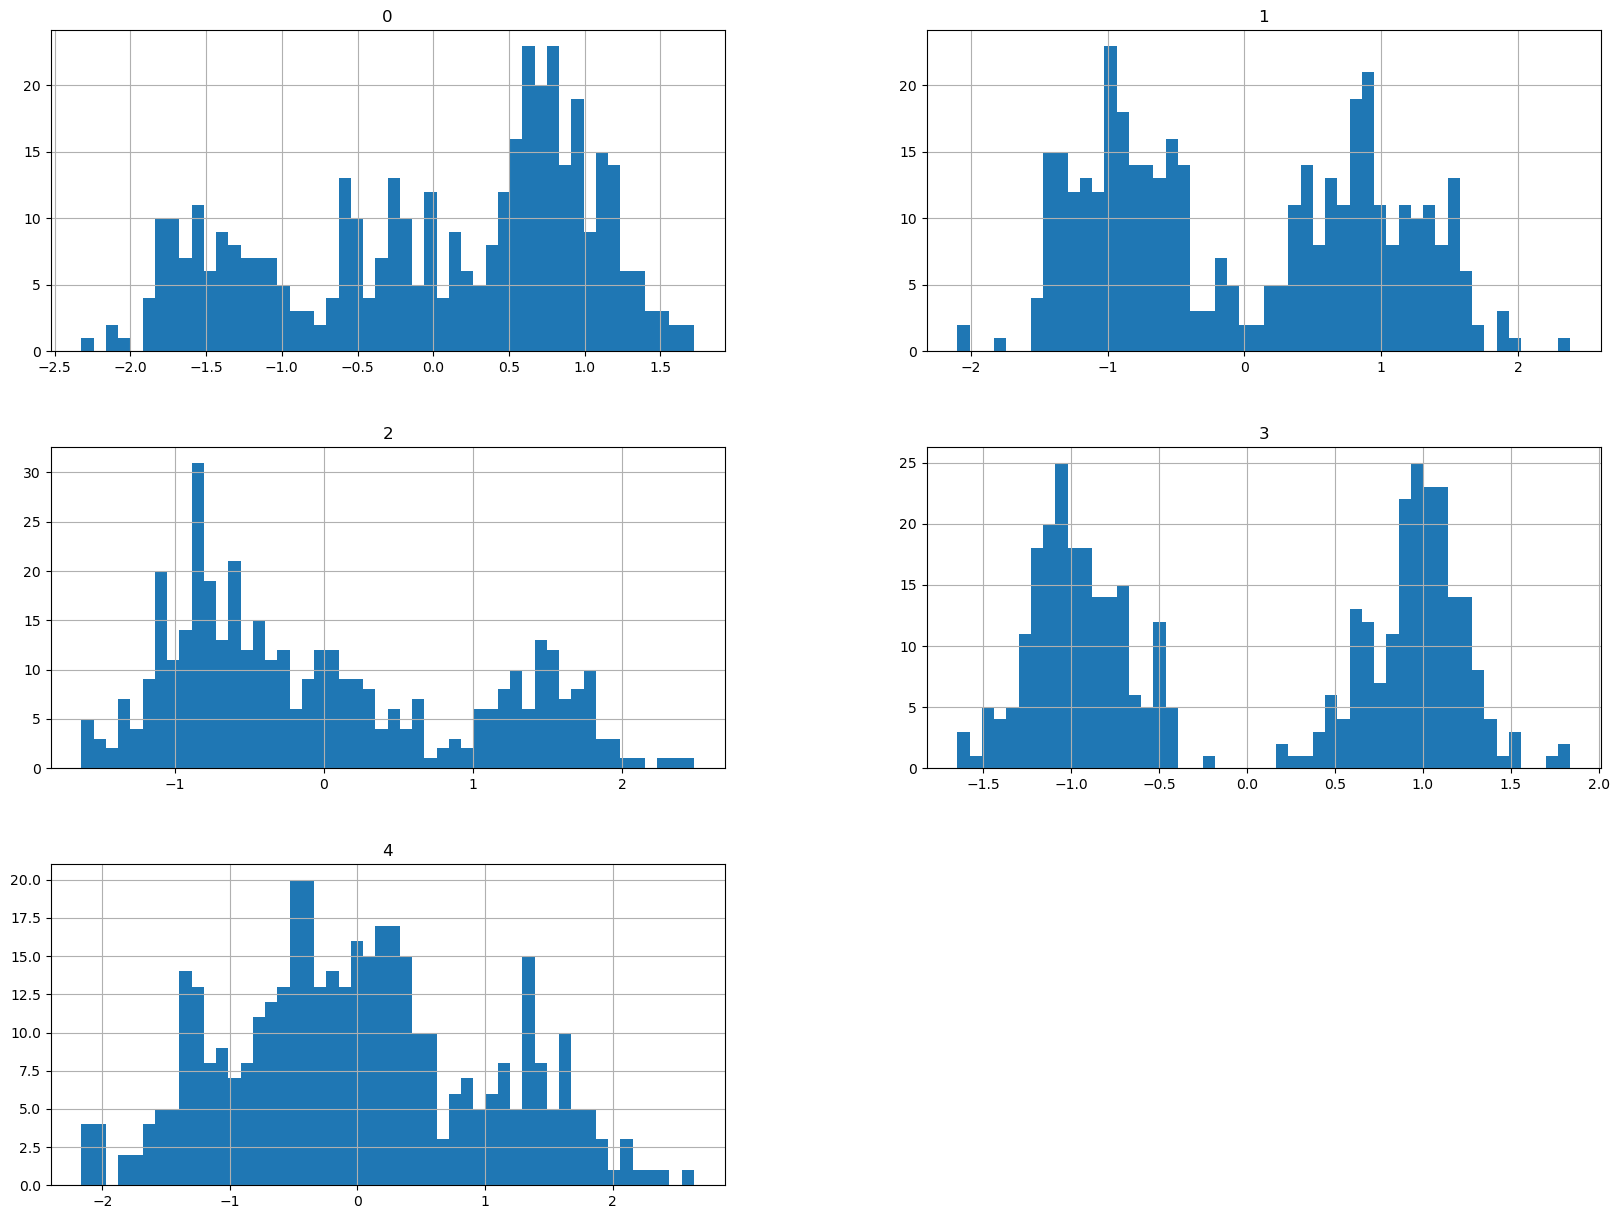

In [20]:
DF.hist(bins=50, figsize=(20,15))
plt.show()

Let's assess our assumptions on the data to ensure our model reacts well to the data: 
1. The homoscedasticity assumption is verified, as the variances are equivalent after standardization of the train data 
2. Normality assumption is not exactly ideal, but our neural network will still make its predictions; i.e. feature 1 and 3 are essentially split into two normal distributions
3. Linearity is met for feature 4 but not as much for other features
4. Independent observations

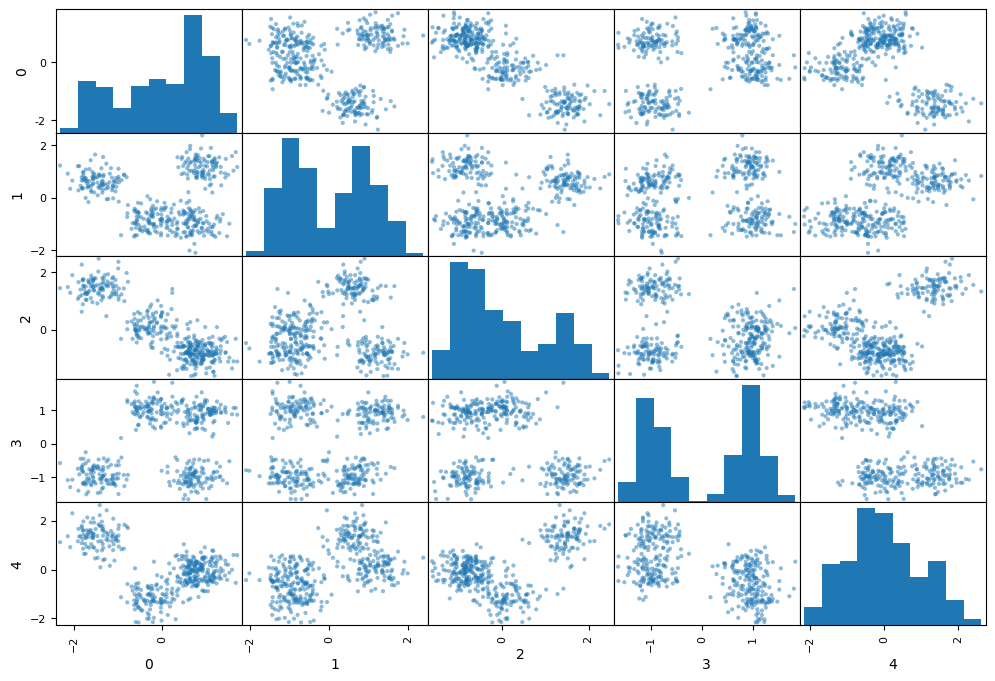

In [21]:
scatter_matrix(DF, figsize=(12,8))
plt.show()

With the standardized data, we can see that the mean is around 0 and deviates to (about) [-2, 2], meaning we've effectively standardized the data as necessary. Let's get an idea for how they relate to the target.

c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

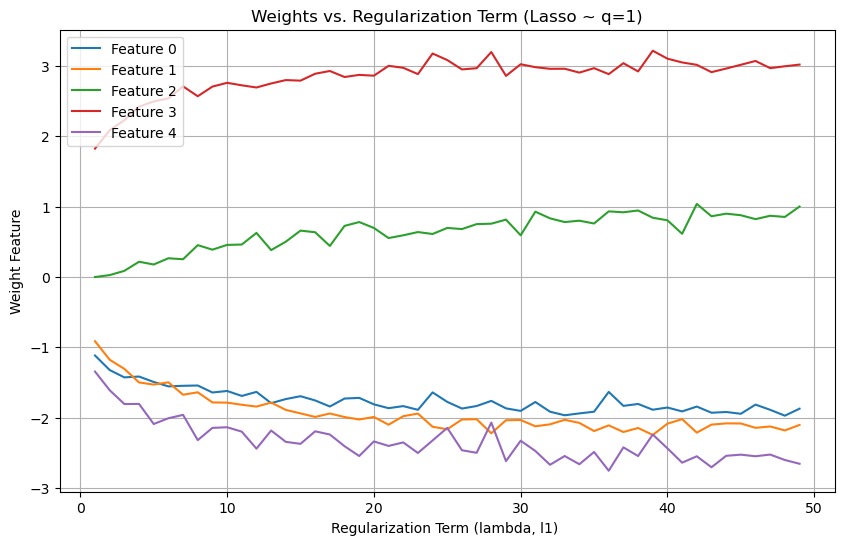

In [22]:
from sklearn.linear_model import LogisticRegression

##comment out for submission, but for convenience..
# import warnings
# warnings.filterwarnings('ignore')

lambdas_l1=50
# lambda >> because orange and blue cross on multiple occasions, we are interested in how it converges
# lambda neutralizes at l1 = 100
C_vals = range(1,lambdas_l1)

W = []

for c in C_vals: 
    clf = LogisticRegression(penalty='l1', solver='saga', C=c)
    clf.fit(X_s, y)
    w, w0 = clf.coef_, clf.intercept_
    W.append(w[0])

W = np.array(W)

plt.figure(figsize=(10, 6))

for i in range(W.shape[1]):
    # plt.subplot(2, 3, i+1)
    plt.plot(C_vals, W[:, i], label=f'Feature {i}')

plt.xlabel('Regularization Term (lambda, l1) ')
plt.ylabel(f'Weight Feature')
plt.title(f'Weights vs. Regularization Term (Lasso ~ q=1)')
# plt.xscale('log')  # Use logarithmic scale for lambda
plt.grid(True)
plt.legend()
plt.show()


### Feature importance: 
https://stackoverflow.com/questions/34052115/how-to-find-the-importance-of-the-features-for-a-logistic-regression-model

In [23]:
from sklearn.inspection import permutation_importance

#permutation_importance is leading to different solutions upon each next run...
# ^ note: permuation_importance is probabalistic not determinstic
np.random.seed(42) # to stop the variation ..
# model = LogisticRegression(penalty='l1', solver='saga', C=75).fit(X_s,y)
model_fi = permutation_importance(clf, X_s, y) # using the final model from Lasso regularization
feature_importance = model_fi['importances']

c = 0
for i in feature_importance:
    if c > 3: 
        break
    x = np.argmax(i)
    print("The most important feature for class " + str(c) + " is feature " + str(x))
    c=c+1


The most important feature for class 0 is feature 1
The most important feature for class 1 is feature 4
The most important feature for class 2 is feature 1
The most important feature for class 3 is feature 3


Notably, we have found the feature importances by class from the above matrix using the permutation_importance method. We have four classes, and we can find the most important feature by taking the argmax of each class. We can be certain that we are finding the most important feature in each class as we are taking the highest value of the weight coefficients for different features, as this feature has the highest correlation to the target.



### Ridge approximation, penalty = 'l2'

c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

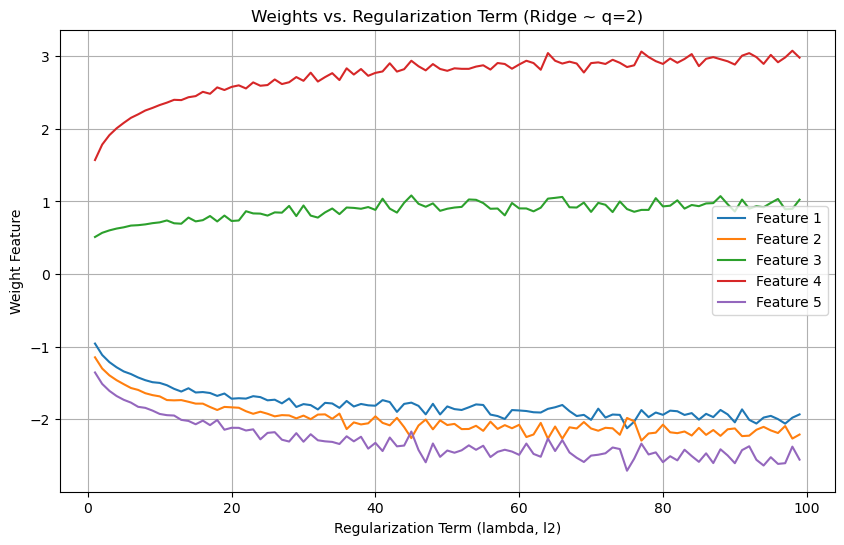

In [24]:
W_r = []
lambdas_l2 = 100
C_vals=range(1,lambdas_l2)

for c in C_vals:
    r1 =LogisticRegression(penalty='l2', solver='saga', C=c)
    r1.fit(X_s,y)
    w, w0 = r1.coef_, r1.intercept_
    W_r.append(w[0])

W_r = np.array(W_r)

plt.figure(figsize=(10, 6))

for i in range(W_r.shape[1]):
    plt.plot(C_vals, W_r[:, i], label=f'Feature {i+1}')

plt.xlabel('Regularization Term (lambda, l2)')
plt.ylabel(f'Weight Feature')
plt.title(f'Weights vs. Regularization Term (Ridge ~ q=2)')
plt.grid(True)
plt.legend()
plt.show()


## Conclusions

Seeing the fact that lasso regularization started with feature 3 having zero weight and then upon iterative increases of lambda on the regularization term, it still ended up converging at a l1-value (lambda = 70) of w3 = 1. This tells me that the model ended up finding importance in feature 3 upon iteratively increasing lambda and 'imposing convergence' (to zero) found instead that all features do have weight on finding the target (as expected). In tempting these features down to zero through lasso regularization and increasing lambda, feature 3 still had weight on the model in lasso regularization upon higher lambda values meaning that even lasso regularization did not find a sparse solution. Intuitively, I believe that the ridge regularization results graph and looking at feature 3 are expected, in that it did not lead to sparse solutions (though it may have initially said that feature 3 had no weight to begin with). In ridge regularization the feature starts with a a weight w3 ~ 0.5, and still converges at roughly the same weight. Thus, if lasso regularization found that all features had some importance, and ridge regularization did as well, I would be more apt to trust the ridge regularization results as the results are saying that all features share relatively the same importance (which is expected given our 'make_blobs' dataset). Lasso regularization may be more apt to find sparse solutions with many, and possibly using features with different levels of importance, but in the case of our dataset it is possible that the model exaggerates importance on the highest weighted features (4 and 5), and would ultimately not suggest or use lasso regularization myself with this kind of data.

Lasso (l1) regularization has more 'noise' than ridge ridge (l2) regularization, in seeing that the feature weights converges earlier. I don't expect a sparse solution, as ridge regularization considers all features independently and equally unlike l1 regularization as it focuses on features that are the most correlated to the target. In this way, l1 regularization leads to, and is more equipped / inclinated for finding sparse solutions, as it may exaggerate or overfit specific features in a set, while ignoring others. This is not always ideal, and it appears to not be ideal in our situation. We can see that the most heavily weighted features (features 4 and 5) reach higher values in the lasso regularization opposed to the ridge regularization, whereas the less-to medium important features (features 1 and 2) are relatively identical in both l1 and l2 regularization. Finding sparse solutions is an expected result with lasso regularization (depending upon data at hand), but our graph identifies healthy levels of correlation in lasso regularization as well as for ridge regularization. If lasso regularization did not find a sparse solution, as it is equipped to do, I did not expect ridge regularization to lead to a sparse solutions. Ridge regularization may have sparse solutions only if lasso regularization finds sparse solutions (and for good reason), where ridge results would be generally more reliable for systems with well-processed data and sufficient domain knowledge. If we could not impose sparsity in the lasso regularizations, then it would not be expected to see sparse solutions in ridge regularization on the data.

https://stats.stackexchange.com/questions/210826/what-is-sparse-solution#:~:text=As%20gamma%20increases%2C%20more%20variables%27%20coefficients%20go%20to,only%20uses%20a%20few%20variables%20in%20the%20dataset.

## Neural Networks: model architecture

In [25]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def _delta(y,ypred):
    return ypred-y

def _cost(y,ypred):
    cost = np.sum(_delta(y,ypred)**2)/2
    return cost


## Input Data

x = np.array([0.7, 0.1, 0.3, 0.5]) ##.reshape(1,4)
y = np.array([1.5]).reshape(-1,1)
w1 = np.array([[0.16, 0.16],[0.02, 0.25],[0.63, 0.22],[0.36, 0.29]]).T
w2 = np.array([0.05, 0.33])

print(f'x shape: {x.shape}, y shape: {y.shape}')
print(f'w1 shape: {w1.shape}, w2.shape: {w2.shape}')
print(w1,w2)


x shape: (4,), y shape: (1, 1)
w1 shape: (2, 4), w2.shape: (2,)
[[0.16 0.02 0.63 0.36]
 [0.16 0.25 0.22 0.29]] [0.05 0.33]


### Forward propogation Y^(0)

In [26]:
## input layer to hidden layer
a1 = np.dot(x.T,w1.T)
z1 = sigmoid(a1)
print(f'z1: \n {z1}')
print(f'shape of a1: {a1.shape}, shape of z1: {z1.shape}')

## hidden layer to output layer
yhat = np.dot(w2.T,z1).reshape(-1,1)
print(f'yhat = {yhat}')
print(f'shape of yhat: {yhat.shape}, shape of y: {y.shape}')
print(f'cost: {_cost(y,yhat)}')

z1: 
 [0.61845603 0.5861325 ]
shape of a1: (2,), shape of z1: (2,)
yhat = [[0.22434653]]
shape of yhat: (1, 1), shape of y: (1, 1)
cost: 0.8136458920928609


### Backpropogation

A. Compute delta2, dE_dW2, then update W2 (eta = 0.1)

In [27]:
eta = 0.1

delta2 = yhat - y
print(f'delta2= {delta2}')

dE_dW2 = delta2*z1
print(f'delta_w2: {dE_dW2}')

new_w2 = w2 - eta*dE_dW2
print(f'new w2 = {new_w2}')

delta2= [[-1.27565347]]
delta_w2: [[-0.78893558 -0.74770196]]
new w2 = [[0.12889356 0.4047702 ]]


B. Compute delta1, dE_dW1, then update W1

In [28]:
def sigmoid_prime(x):
    return x*(1-x)

dz1 = sigmoid_prime(z1)
delta1 = (delta2*w2)*dz1 #                  ""
dE_dW1 = delta1.T*x #2x1 x 1x4 -> 2x4 # getting different values than professor 
new_w1 = w1 - eta*dE_dW1

print(f'dz1: \n {dz1}')
print(f'delta1: \n {delta1}')
print(f'dE_dW1: \n {dE_dW1}')
print(f'new w1: \n {new_w1}') #remember to change actual w1 upon multiple iterations

dz1: 
 [0.23596817 0.24258119]
delta1: 
 [[-0.01505068 -0.10211835]]
dE_dW1: 
 [[-0.01053548 -0.00150507 -0.0045152  -0.00752534]
 [-0.07148284 -0.01021183 -0.0306355  -0.05105917]]
new w1: 
 [[0.16105355 0.02015051 0.63045152 0.36075253]
 [0.16714828 0.25102118 0.22306355 0.29510592]]


In [29]:
a1 = np.dot(x.T,w1.T)
z1 = sigmoid(a1)
print(f'z1: \n {z1}')
w2=new_w2  #remember to update w2 << 
yhat= np.dot(new_w2,z1)   #predict (using updated w2)
print(f'yhat: \n {yhat}')


z1: 
 [0.61845603 0.5861325 ]
yhat: 
 [0.31696397]


In [30]:
"""
32 Iterations
n = 0.1
Estimating Y^
"""

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    return x*(1-x)

def _delta(y,ypred):
    return ypred-y

def _cost(y,ypred):
    cost = np.sum(_delta(y,ypred)**2)/2
    return cost


def fBNN(x,y,w1,w2,eta,epoch):
    cost_list = []
    epoch_list = []
    ypred_list = []

    for i in range(1,epoch+1):
        """
        forward propagation
        """
        a1 = np.dot(x,w1)
        z1 = sigmoid(a1) #relu(a1) #sigmoid(a1) 
        yhat = np.dot(w2,z1.T).reshape(-1,1)
        cost = _cost(y, yhat) #cost_list[i-1]
    
        if i == 1:
            print(f'start epoch: \n cost: {cost}, y_pred = {yhat}')

        """
        backpropagation from the output layer to the hidden layer
        """
        delta2 = yhat - y
        dE_dW2 = delta2*z1
        w2 = w2 - eta*dE_dW2
        
        """
        beckpropagation from the hidden layer to the input layer
        """
        dz1 = sigmoid_prime(z1) #reluprime(z1) #sigmoid_prime(z1)
        delta1 = np.dot(delta2, w2)*dz1 # -1.5?
        dE_dW1 = np.dot(delta1.T,x) #2x1 x 1x4 -> 2x4S
        w1 = w1 - (eta*dE_dW1).reshape(4,2)

        """
        forward propagation with new weights
        """
        a1 = np.dot(x,w1)
        z1 = sigmoid(a1) #relu(a1) #sigmoid(a1) 
        yhat = np.dot(w2,z1.T).reshape(-1,1) #check
        cost = _cost(y, yhat)
        
        if(i == 1):
            print(f'end of start epoch: \n cost: {cost}, y_pred = {yhat}')


        ## Early Stop
        if i>=1 and cost >=3E-5: #change this if want to see complete guess of machine
            epoch_list.append(i)
            ypred_list.append(yhat)
            cost_list.append(cost)
        if i > 1 and cost <= 3E-5:
            print("early stop epoch:",i,"cost:",cost,"y_pred:",yhat)
            break
        
    
    
    print(f'last epoch {i}: \n',"cost:",cost,"y_pred:",yhat) 
    # print(f'w1: {w1}  w2: {w2} ')        
    plt.plot(epoch_list, cost_list)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()

    # print(epoch_list, [float(ar[0,0]) for ar in ypred_list])
    plt.plot(epoch_list, [float(ar[0,0]) for ar in ypred_list])
    plt.xlabel('epoch')
    plt.ylabel('ypred')
    plt.show()
    
    return w1, w2

start epoch: 
 cost: 0.8136458920928609, y_pred = [[0.22434653]]
end of start epoch: 
 cost: 0.6990913170996477, y_pred = [[0.31755227]]
last epoch 32: 
 cost: 0.0031316846935253856 y_pred: [[1.42085855]]


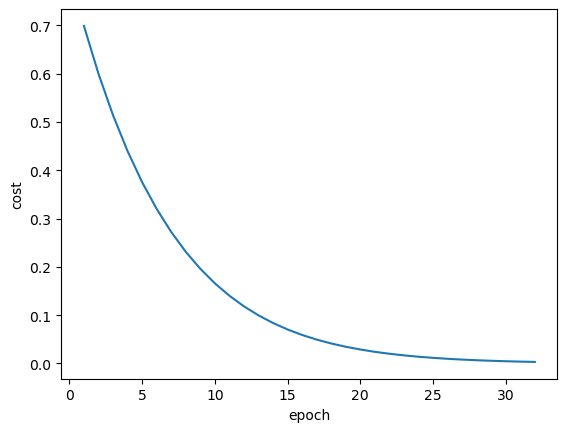

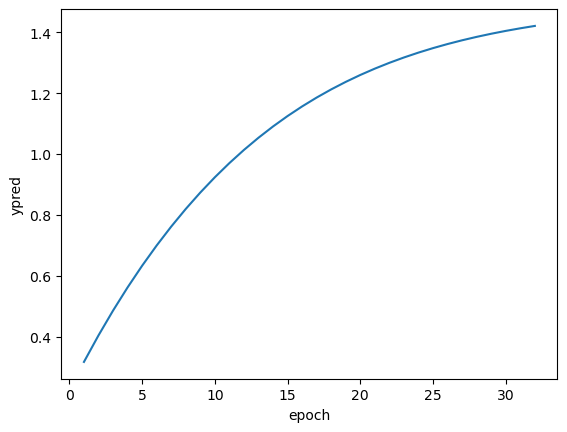

time: 0.3324851989746094


In [31]:
import time
x = np.array([0.7 , 0.1 , 0.3 , 0.5]).reshape(1, 4)  # X ~ 1 col x 4 rows
y = np.array([1.5]).reshape(-1,1) # target
w1 = np.array([[0.16, 0.16] ,[0.02, 0.25],[0.63, 0.22] ,[0.36, 0.29]])
w2 = np.array([0.05 , 0.33]) 

eta = 0.1
epoch = 32  # it may be wise to choose 2^(6+) to see how the learning and predictions converge
start = time.time()
w1, w2 = fBNN(x, y, w1, w2, eta, epoch)
end = time.time()
print(f"time: {end-start}")

We are able to achieve a very low cost (error) with fast computations, and our graphs provide context as to how our cost and predictions improve over the learning process.

### Scikit-learn neural network

In [32]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import time

activations = ['tanh','logistic','relu']
for activation in activations:
    start = time.time()
    nn = MLPRegressor(max_iter = 100000, activation=activation, solver = 'lbfgs', learning_rate_init = 0.01, learning_rate =  'invscaling')
    nn.fit(x,y)
    y_pred = nn.predict(x)
    end = time.time()
    print(f'activation: {activation}, n_iter: {nn.n_iter_}, mse = {mean_squared_error(y,y_pred)}, number of layers = {nn.n_layers_}, excution time: {end-start}')
    print(f'coefficient size = {[coef.shape for coef in nn.coefs_]}, y_pred: {y_pred}')

activation: tanh, n_iter: 4, mse = 1.8468876109961828e-10, number of layers = 3, excution time: 0.003711223602294922
coefficient size = [(4, 100), (100, 1)], y_pred: [1.49998641]
activation: logistic, n_iter: 2, mse = 3.0100422125849006e-11, number of layers = 3, excution time: 0.0021185874938964844
coefficient size = [(4, 100), (100, 1)], y_pred: [1.49999451]
activation: relu, n_iter: 4, mse = 1.1235105564464958e-09, number of layers = 3, excution time: 0.0026595592498779297
coefficient size = [(4, 100), (100, 1)], y_pred: [1.49996648]


c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mkear\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We achieve a very low error rate as well as very fast execution time, without taking too much computational reources using the above hyperparameterization. The 'lbfgs' solver computes with gradient descent very quickly and accurately and is working well with all of the activation functions includiing the rectified linear unit, tanh, ReLU, as well as by starting at a non-constant learning rate starting at 0.1. It does not matter all too much in this case which activation function we choose as they all generally reach the same level of learning under different conditions. I may chooose the sigmoid function ('logistic') as it appears to reach the smallest error results upon different fittings of the MPLRegressor NN model.